In [1]:
# Importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from URL_Features import getDomain, getURL_Length, getDomain_Length, getURL_Depth, getURL_IP, getURL_AtSymbol, getURLDomain_HTTP
from URL_Features import getURL_RedirectPosition, getURL_HyphenInDomain, getURL_Dot, getURL_HTTPs, getURL_ASCII, getURL_Digits
from HTMLJS_Features import HTMLJS_FeaturesThreading

In [2]:
# Loading the data
urlData = pd.read_csv("data/data_bal20000.csv")

urlData.head(10)

,Labels,URLs
0,1,http://dbs.vote-friend.com/sg?ref=anything
1,0,https://www.reynoldstransfer.com/versa-lift-fo...
2,1,https://www.halisupportservice.com/Login.php
3,0,https://www.signets.com.br/wp-includes/wlwmani...
4,1,https://docs.google.com/document/d/e/2PACX-1vT...
5,0,https://www.iwestco.com/virtual-consult/
6,1,https://is.gd/N19JOz
7,1,https://httpsservices.runescape.com-ov.ru/
8,1,https://viandjo.com/website/membership/service...
9,0,https://www.millect.com/Plans/tabid/76/Default...


c:\Users\Or3a\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


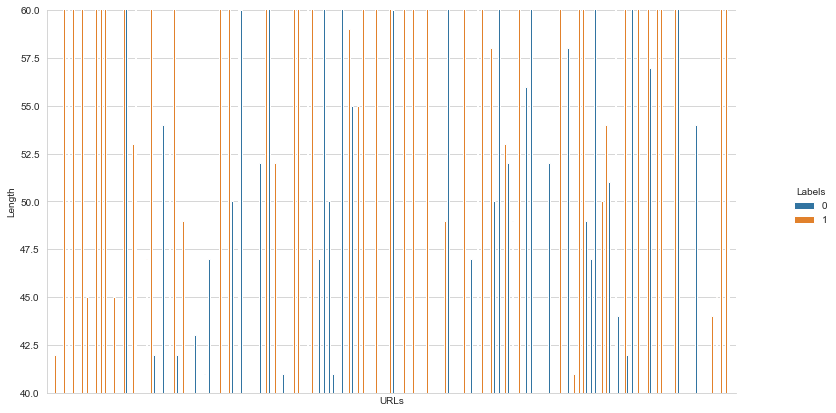

In [3]:

urlData['Length'] = urlData['URLs'].tail(150).str.len()

sns.set_style("whitegrid")
g = sns.catplot(data=urlData.tail(150), x="URLs", y="Length", hue="Labels", kind="bar")
g.set_axis_labels("URLs", "Length")

g.fig.set_figheight(6)
g.fig.set_figwidth(12)

g.set(xticks=[])
plt.ylim(40, 60)

del urlData["Length"]


c:\Users\Or3a\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


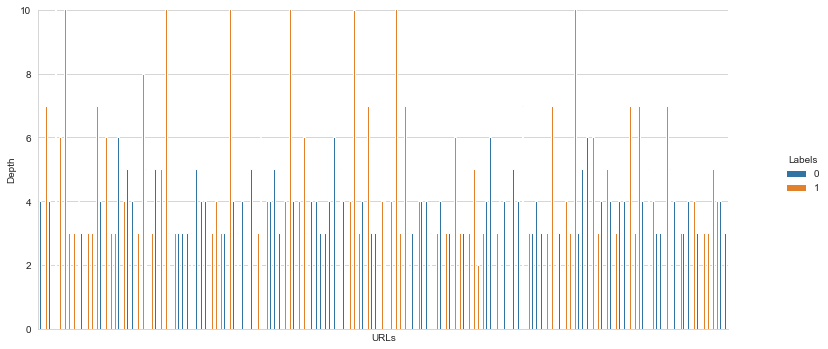

In [4]:

urlData['Depth'] = urlData['URLs'].tail(150).str.count('/')

sns.set_style("whitegrid")
g = sns.catplot(data=urlData.tail(150), x="URLs", y="Depth", hue="Labels", kind="bar")
g.set_axis_labels("URLs", "Depth")

g.fig.set_figheight(5)
g.fig.set_figwidth(12)

g.set(xticks=[])
plt.ylim(0, 10)

del urlData["Depth"]


c:\Users\Or3a\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


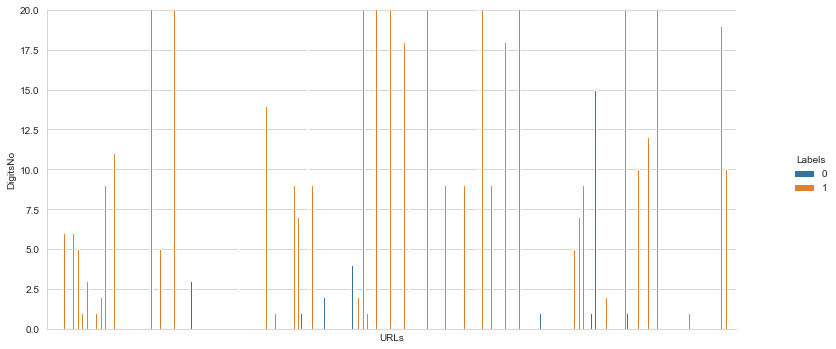

In [5]:

urlData['DigitsNo'] = urlData['URLs'].tail(150).str.count('\d')

sns.set_style("whitegrid")
g = sns.catplot(data=urlData.tail(150), x="URLs", y="DigitsNo", hue="Labels", kind="bar")
g.set_axis_labels("URLs", "DigitsNo")

g.fig.set_figheight(5)
g.fig.set_figwidth(12)

g.set(xticks=[])
plt.ylim(0, 20)

del urlData["DigitsNo"]


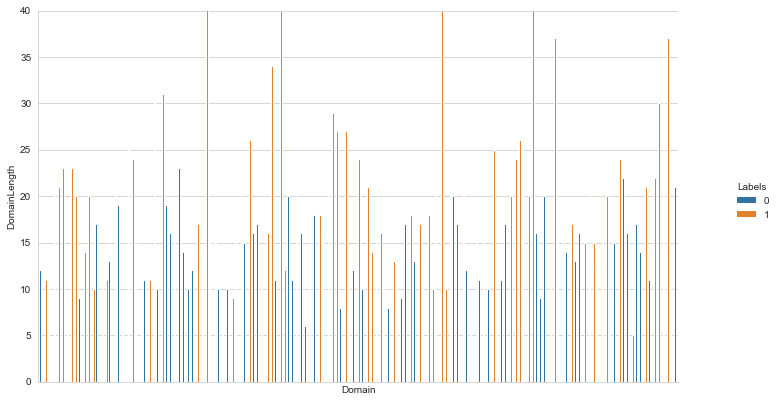

In [6]:

getDomain(urlData)

urlData['DomainLength'] = urlData['Domain'].tail(150).str.len()

sns.set_style("whitegrid")
g = sns.catplot(data=urlData.tail(150), x="Domain", y="DomainLength", hue="Labels", kind="bar")
g.set_axis_labels("Domain", "DomainLength")

g.fig.set_figheight(6)
g.fig.set_figwidth(12)

g.set(xticks=[])
plt.ylim(0, 40)

del urlData["DomainLength"]



In [7]:
# Feature extraction

# 1. Domain name
getDomain(urlData)

# 2. URL length
getURL_Length(urlData)

# 3. Domain length
getDomain_Length(urlData)

# 3. URL depth (number of slashes)
getURL_Depth(urlData)

# 4. URL @ symbol presence
getURL_AtSymbol(urlData)

# 5. IP address presence in URL
getURL_IP(urlData)

# 6. Transport layer security (TLS) presence in URL
getURL_HTTPs(urlData)

# 7. HTTP/HTTPS presence in URL Domain
getURLDomain_HTTP(urlData)

# 8. // Redirect postion in URL
getURL_RedirectPosition(urlData)

# 9. Prefix and suffix '-'
getURL_HyphenInDomain(urlData)

# 10. Number of '.' in URL Domain
getURL_Dot(urlData)

# 11. Unicode characters in URL
getURL_ASCII(urlData)

# 12. Number of digits in URL
getURL_Digits(urlData)

# HTML JS features
HTMLJS_FeaturesThreading(urlData)

urlData.head(10)


c:\Users\Or3a\anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:102: UserWarning: expected name token at '<![\x1bT´Çíè\x8al"ó8*\x98\x9b-\x96l'
  warnings.warn(msg)


,Labels,URLs,Domain,URL_Length,Domain_Length,URL_depth,URL_atSymbol,URL_IP,URL_HTTPS,Domain_HTTP,URL_RedirectPosition,URL_HyphenInDomain,URL_DotsNo,URL_NonASCHIIChar,URL_DigitsNo,HTMLJS_Features
0,1,http://dbs.vote-friend.com/sg?ref=anything,dbs.vote-friend.com,0,1,0,0,0,1,0,1,1,-1,0,0,0
1,0,https://www.reynoldstransfer.com/versa-lift-fo...,reynoldstransfer.com,-1,1,-1,0,0,0,0,0,0,0,0,0,1
2,1,https://www.halisupportservice.com/Login.php,halisupportservice.com,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,https://www.signets.com.br/wp-includes/wlwmani...,signets.com.br,-1,-1,-1,0,0,0,0,0,0,-1,0,0,0
4,1,https://docs.google.com/document/d/e/2PACX-1vT...,docs.google.com,1,-1,1,0,0,0,0,0,0,-1,0,1,0
5,0,https://www.iwestco.com/virtual-consult/,iwestco.com,0,0,-1,0,0,0,0,0,0,0,0,0,0
6,1,https://is.gd/N19JOz,is.gd,0,1,0,0,0,0,0,0,0,0,0,0,0
7,1,https://httpsservices.runescape.com-ov.ru/,httpsservices.runescape.com-ov.ru,0,1,0,0,0,0,1,0,1,1,0,0,0
8,1,https://viandjo.com/website/membership/service...,viandjo.com,1,0,1,0,0,0,0,0,0,0,0,1,0
9,0,https://www.millect.com/Plans/tabid/76/Default...,millect.com,-1,0,1,0,0,0,0,0,0,0,0,0,0


In [8]:
# urlData.to_csv(r'data/20000URL_Features.csv', index = False)